In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [103]:
#reading data
train = pd.read_csv('intracity_fare_train.csv')
test = pd.read_csv('intracity_fare_test.csv')

In [104]:
#converting the TIMESTAMP to DATETIME 
#prices depend on what time you board the taxi e.g.- fare of a taxi at 1 am is more than than fare at 1 pm
#dividing each three hours into one category -e.g.- price at 1 am is likely to be same as 4 am

train['TIMESTAMP'] = pd.to_datetime(train['TIMESTAMP']).apply(lambda x: x.hour // 3)
test['TIMESTAMP'] = pd.to_datetime(test['TIMESTAMP']).apply(lambda x: x.hour // 3)

In [105]:
train.head()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE
0,1,2,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09
1,2,7,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99
2,3,1,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33
3,4,6,NaN,NaN,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21
4,5,0,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62


In [106]:

print(train.info())
print("*******************************************************")
print(test.info())

#dataset has many NAN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
ID                       20000 non-null int64
TIMESTAMP                20000 non-null int64
STARTING_LATITUDE        19325 non-null float64
STARTING_LONGITUDE       19325 non-null float64
DESTINATION_LATITUDE     19337 non-null float64
DESTINATION_LONGITUDE    19337 non-null float64
VEHICLE_TYPE             20000 non-null object
TOTAL_LUGGAGE_WEIGHT     5648 non-null float64
WAIT_TIME                5648 non-null float64
TRAFFIC_STUCK_TIME       20000 non-null int64
DISTANCE                 20000 non-null int64
FARE                     20000 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.8+ MB
None
*******************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
ID                       20000 non-null int64
TIMESTAMP                20000 non-null int64
ST

In [108]:
train.describe()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE
count,20000.000000,20000.000000,19325.000000,19325.000000,19337.000000,19337.000000,5648.000000,5648.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,3.488800,20.111445,79.794135,20.129680,79.793273,15.447238,9.433605,30.066750,30.543050,251.926063
std,5773.647028,2.281652,5.908449,4.939736,5.909585,4.941561,8.558223,5.779630,21.951902,12.123407,300.067490
min,1.000000,0.000000,12.842900,72.835882,12.843029,72.835873,1.000000,0.000000,0.000000,0.000000,7.000000
25%,5000.750000,1.000000,13.086064,77.093570,13.087377,77.087018,8.000000,4.000000,12.000000,22.000000,42.097500
50%,10000.500000,3.000000,19.231625,77.705107,19.235435,77.706558,15.000000,9.000000,26.000000,31.000000,75.330000
75%,15000.250000,5.000000,25.317237,82.990730,25.317921,82.990571,23.000000,14.000000,45.000000,40.000000,416.130000
max,20000.000000,7.000000,28.770716,88.452179,28.770713,88.452149,30.000000,19.000000,95.000000,99.000000,1972.000000


In [114]:
train['VEHICLE_TYPE'].unique()
#the dataset in trying to mislead us by showing so many VEHICLES TYPES 

array(['Bus', 'Taxi AC', 'Taxi Non AC', 'Metro', 'bus', 'AC bus',
       'taxi Non ac', 'metro', 'mini bus', 'mini Bus', 'Auto Rickshaw',
       'Taxi non ac', 'ac bus', 'Ac Bus', 'Auto rickshaw', 'AUTO RICKSHAW',
       'taxi non ac', 'AC Bus', 'auto rickshaw', 'taxi ac', 'taxi Non Ac',
       'Mini bus', 'Taxi non Ac', 'taxi non Ac', 'Mini Bus'], dtype=object)

In [67]:
#convert all the VEHICLE TYPES to lower case to see how many vehicles are actually there

train['VEHICLE_TYPE'] = train['VEHICLE_TYPE'].apply(lambda x: x.lower())
test['VEHICLE_TYPE'] = test['VEHICLE_TYPE'].apply(lambda x: x.lower())
train['VEHICLE_TYPE'].unique()


#there are only a total of 7 vehicle types

array(['bus', 'taxi ac', 'taxi non ac', 'metro', 'ac bus', 'mini bus',
       'auto rickshaw'], dtype=object)

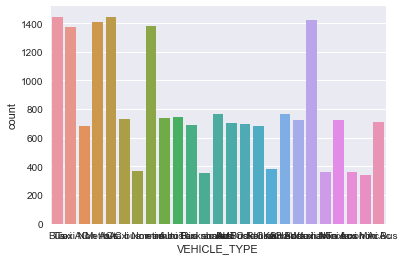

In [115]:
#countplot to see the no of time each vehicle was used for transport
sns.countplot(x='VEHICLE_TYPE', data=train)

In [69]:
# a function writen to see information of each vehicle type 

for vehicle_type in train['VEHICLE_TYPE'].unique():
    subset = train.loc[train['VEHICLE_TYPE'] == vehicle_type]
    print(vehicle_type," : Total count = ",len(subset),"\n",subset.isnull().sum())
    print("\n")

bus  : Total count =  2885 
 ID                          0
TIMESTAMP                   0
STARTING_LATITUDE          97
STARTING_LONGITUDE         97
DESTINATION_LATITUDE      103
DESTINATION_LONGITUDE     103
VEHICLE_TYPE                0
TOTAL_LUGGAGE_WEIGHT     2885
WAIT_TIME                2885
TRAFFIC_STUCK_TIME          0
DISTANCE                    0
FARE                        0
dtype: int64


taxi ac  : Total count =  2798 
 ID                        0
TIMESTAMP                 0
STARTING_LATITUDE        91
STARTING_LONGITUDE       91
DESTINATION_LATITUDE     94
DESTINATION_LONGITUDE    94
VEHICLE_TYPE              0
TOTAL_LUGGAGE_WEIGHT      0
WAIT_TIME                 0
TRAFFIC_STUCK_TIME        0
DISTANCE                  0
FARE                      0
dtype: int64


taxi non ac  : Total count =  2850 
 ID                        0
TIMESTAMP                 0
STARTING_LATITUDE        91
STARTING_LONGITUDE       91
DESTINATION_LATITUDE     77
DESTINATION_LONGITUDE    77
VEHICLE

In [70]:
#from the above information we realise that fare of a bus or metro does not depend on the luggage we carry
# and wait time ........fare of a bus remains same if it is stuck in traffic 
# From now on, we make two models one for Taxi (AC and NON AC both), and other for remaining 5 vehicle types


## ( | ) stands for union and & stands for intersextion
## taxi train contains info about the taxi( ac and non ac)
## other train contains info about the other 5 vehicles types
taxi_train = train.loc[(train['VEHICLE_TYPE'] == 'taxi ac') | (train['VEHICLE_TYPE'] == 'taxi non ac')]
other_train = train.loc[(train['VEHICLE_TYPE'] != 'taxi ac') & (train['VEHICLE_TYPE'] != 'taxi non ac')]

print("taxi_train.shape : ",taxi_train.shape)
print("other_train.shape : ",other_train.shape)

taxi_test = test.loc[ (test['VEHICLE_TYPE'] == 'taxi ac') | (test['VEHICLE_TYPE'] == 'taxi non ac')]
other_test = test.loc[(test['VEHICLE_TYPE'] != 'taxi ac') & (test['VEHICLE_TYPE'] != 'taxi non ac')]
print("taxi_test.shape : ",taxi_test.shape)
print("other_test.shape : ",other_test.shape)

taxi_test.shape :  (5739, 11)
other_test.shape :  (14261, 11)


In [71]:
print( taxi_train.info())
print("***********************************************************************")
print(taxi_test.info())

print( other_train.info())
print("***********************************************************************")
print(other_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5648 entries, 1 to 19997
Data columns (total 12 columns):
ID                       5648 non-null int64
TIMESTAMP                5648 non-null int64
STARTING_LATITUDE        5466 non-null float64
STARTING_LONGITUDE       5466 non-null float64
DESTINATION_LATITUDE     5477 non-null float64
DESTINATION_LONGITUDE    5477 non-null float64
VEHICLE_TYPE             5648 non-null object
TOTAL_LUGGAGE_WEIGHT     5648 non-null float64
WAIT_TIME                5648 non-null float64
TRAFFIC_STUCK_TIME       5648 non-null int64
DISTANCE                 5648 non-null int64
FARE                     5648 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 573.6+ KB
None
***********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5739 entries, 6 to 19995
Data columns (total 11 columns):
ID                       5739 non-null int64
TIMESTAMP                5739 non-null int6

In [72]:
#other_train and other_test has 0 non null WAIT_TIME and TOTAL_LUGGAGE_WEIGHT
other_train.drop(['WAIT_TIME','TOTAL_LUGGAGE_WEIGHT'],axis=1,inplace=True)
other_test.drop(['WAIT_TIME','TOTAL_LUGGAGE_WEIGHT'],axis=1,inplace=True)

In [73]:
#Dropping langitudes and longitudes for now
#taxi_train.drop(['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE'],axis=1,inplace=True)
#taxi_test.drop(['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE'],axis=1,inplace=True)

#other_train.drop(['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE'],axis=1,inplace=True)
#other_test.drop(['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE'],axis=1,inplace=True)

#latitudes and longitudes originate from some fixed points
#filling latitudes with median because filling it with mean may give us a whole new latitude (location) 
#therefore i fliled it with median

taxi_train.fillna(train['STARTING_LATITUDE'].median(), inplace=True)
other_train.fillna(train['STARTING_LATITUDE'].median(), inplace=True)

In [76]:
print(taxi_train.info())
print("*******************************************************")
print(taxi_test.info)
print("*******************************************************")
print9other_train.info()
print("*******************************************************")
print(other_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5648 entries, 1 to 19997
Data columns (total 12 columns):
ID                       5648 non-null int64
TIMESTAMP                5648 non-null int64
STARTING_LATITUDE        5648 non-null float64
STARTING_LONGITUDE       5648 non-null float64
DESTINATION_LATITUDE     5648 non-null float64
DESTINATION_LONGITUDE    5648 non-null float64
VEHICLE_TYPE             5648 non-null object
TOTAL_LUGGAGE_WEIGHT     5648 non-null float64
WAIT_TIME                5648 non-null float64
TRAFFIC_STUCK_TIME       5648 non-null int64
DISTANCE                 5648 non-null int64
FARE                     5648 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 573.6+ KB
None
*******************************************************
<bound method DataFrame.info of           ID  TIMESTAMP  STARTING_LATITUDE  STARTING_LONGITUDE  \
6          7          3          13.006167           77.595210   
8          9          5          13.192150      

NameError: name 'print9other_train' is not defined

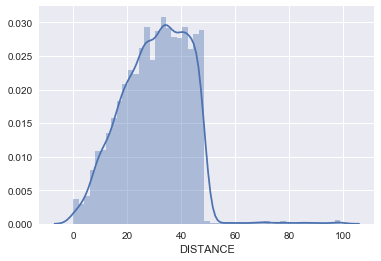

In [77]:
#TAXI TRAIN
sns.distplot(taxi_train['DISTANCE'])

In [78]:
#mapping the vehicles as integer values in the dataframe 0 for taxi ac and 1 for non ac taxi

taxi_train['VEHICLE_TYPE'] = taxi_train['VEHICLE_TYPE'].map({'taxi ac':0,'taxi non ac':1})
taxi_test['VEHICLE_TYPE'] = taxi_test['VEHICLE_TYPE'].map({'taxi ac':0,'taxi non ac':1})

In [79]:
#there are 5 vehicle types I am trying to create new columns using one_hot encoding scheme and map each of these string type vehicles
#into 1 or 0 eg.create a new row of metro and label it as 1 whenever metro is used else label it as 0

## any one row can be dropped since the probability of other row being 0 is the same as that row being one
#if not removed, to many features can overfit the data

one_hot = pd.get_dummies(other_train['VEHICLE_TYPE'])
other_train.drop(['VEHICLE_TYPE'],axis=1,inplace=True)
other_train = other_train.join(one_hot)
other_train.drop(['ac bus'],axis=1,inplace=True) #Drop any 1
print( other_train.columns)

one_hot = pd.get_dummies(other_test['VEHICLE_TYPE'])
other_test.drop(['VEHICLE_TYPE'],axis=1,inplace=True)
other_test = other_test.join(one_hot)
other_test.drop(['ac bus'],axis=1,inplace=True) #Drop same one as dropped in train set
print(other_test.columns)

#Either below one or above one, not both together

#i've chosen the above one because the cross validation accuracy was more on it

#other_train['VEHICLE_TYPE'] = other_train['VEHICLE_TYPE'].map({'auto rickshaw':0,'mini bus':1,'ac bus':2,'metro':3,'bus':4})
#other_test['VEHICLE_TYPE'] = other_test['VEHICLE_TYPE'].map({'auto rickshaw':0,'mini bus':1,'ac bus':2,'metro':3,'bus':4})


In [80]:
#TAXI DATASET TRAINING
train_X = taxi_train.drop(['ID','FARE'],axis=1)
Y = taxi_train['FARE']
test_X = taxi_test.drop(['ID'],axis=1)

#OTHER DATASET TRAINING
#train_X = other_train.drop(['ID','FARE'],axis=1)
#Y = other_train['FARE']
#test_X = other_test.drop(['ID'],axis=1)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_X, Y, test_size = 0.20)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [83]:
#applying gradient boosting technique
import lightgbm as lgb

In [84]:
#parameters were tuned with the help of KAGGLE'S KERNEL
params = {
    'task': 'train',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}


In [85]:
dtrain = lgb.Dataset(X_train, Y_train)
#dval = lgb.Dataset(X_val, Y_val)
clf = lgb.train(params, dtrain,num_boost_round=100)
preds = clf.predict(X_val)
print(r2_score(Y_val,preds)*200)


184.886176343


In [86]:
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.05) #the params were tuned using xgb.cv
model_xgb.fit(X_train, Y_train)
preds = model_xgb.predict(X_val)
print(r2_score(Y_val,preds)*200)

NameError: name 'xgb' is not defined

In [87]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
pre=model.predict(X_val)
print(r2_score(Y_val,pre)*200)

144.907885104


In [88]:
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1)
svr.fit(X_train,Y_train)
preds = svr.predict(X_val)
print( r2_score(Y_val,preds)*200)

141.123683531


In [89]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

In [90]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,Y_train)
preds = ridge.predict(X_val)
r2_score(Y_val,preds)*200

144.9078610515318

In [91]:
lasso = LassoCV(alphas=[0.01,0.1,1,2])
lasso.fit(X_train,Y_train)
preds = lasso.predict(X_val)
r2_score(Y_val,preds)*200

144.9055230827189

In [92]:
##XGB 
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.05)
model_xgb.fit(taxi_train.drop(['ID','FARE'],axis=1), taxi_train['FARE'])
preds = model_xgb.predict(taxi_test.drop(['ID'],axis=1))
df1 = pd.DataFrame({'FARE':preds,'ID':taxi_test['ID']})

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.05)
model_xgb.fit(other_train.drop(['ID','FARE'],axis=1), other_train['FARE'])
preds = model_xgb.predict(other_test.drop(['ID'],axis=1))
df2 = pd.DataFrame({'ID':other_test['ID'],'FARE':preds})

In [98]:
#LGBM HAS WON BY A SMALL MARGIN OVER XGBOOST
dtrain=lgb.Dataset(taxi_train.drop(['ID','FARE'],axis=1),taxi_train['FARE'])
clf = lgb.train(params, dtrain,num_boost_round=100)
preds = clf.predict(taxi_test.drop(['ID'],axis=1))
df1 = pd.DataFrame({'FARE':preds,'ID':taxi_test['ID']})

In [101]:
#LGBM
dtrain2=lgb.Dataset(other_train.drop(['ID','FARE'],axis=1), other_train['FARE'])
clf2 = lgb.train(params, dtrain2,num_boost_round=100)
preds = clf2.predict(other_test.drop(['ID'],axis=1))
df2 = pd.DataFrame({'ID':other_test['ID'],'FARE':preds})

In [102]:
result = pd.concat([df1,df2]).sort_values(['ID'])
result[['ID','FARE']].to_csv('avishkarLGBM3.csv',index=False)

In [ ]:
\